The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0
[array([0., 0.]), array([0.015     , 0.03708099]), array([-0.015     , -0.03708099]), array([-0.015     , -0.03708099]), array([0.015     , 0.03708099]), array([0.03      , 0.07416198]), array([-0.03      , -0.07416198]), array([-0.03      , -0.07416198]), array([0.03      , 0.07416198]), array([0.045     , 0.11124298]), array([-0.045     , -0.11124298]), array([-0.045     , -0.11124298]), array([0.045     , 0.11124298]), array([0.06      , 0.14832397]), array([-0.06      , -0.14832397]), array([-0.06      , -0.14832397]), array([0.06      , 0.14832397]), array([0.075     , 0.18540496]), array([-0.075     , -0.18540496]), array([-0.075     , -0.18540496]), array([0.075     , 0.18540496]), array([0.09      , 0.22248595]), array([-0.09      , -0.22248595]), array([-0.09      , -0.22248595]), array([0.09      , 0.22248595]), array([-0.03708099,  0.015     ]), array([-0.03708099,  0.015     ]), array(

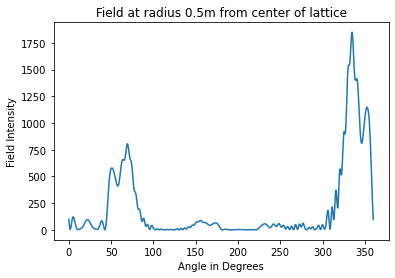

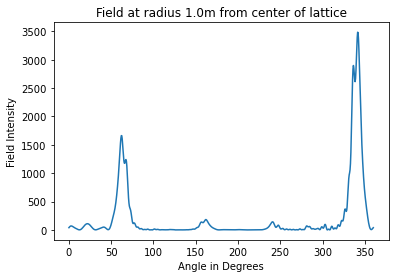

In [15]:
%load_ext autoreload
%autoreload


from numpy import *
import MeiCalc as MC
import matplotlib.pyplot as plt


#for specific lambda and d find theta and create crystal from there


d = .04
braggO = arcsin(MC.lamda/(2*d))

pltLine = 2*braggO


parallelB =  multiply([sin(braggO),cos(braggO)],d)
perpB = array([-parallelB[1],parallelB[0]])

orig = [0.0,0.0]
#these are the x and y positions of the spheres relative to the middle of the "line"
r_sp = [array(orig)]



rows = 7
cols = 2
for col in range(0,cols):
    for row in range(0,rows):
        if (col == 0 and row == 0):
            print(row)
            continue
        cs = add(orig,multiply(row,parallelB))
        cs = add(cs,multiply(col,perpB))
        r_sp.append(cs)
        cs = add(orig,multiply(row,-parallelB))
        cs = add(cs,multiply(col,perpB))
        r_sp.append(cs)
        cs = add(orig,multiply(row,-parallelB))
        cs = add(cs,multiply(col,-perpB))
        r_sp.append(cs)
        cs = add(orig,multiply(row,parallelB))
        cs = add(cs,multiply(col,-perpB))
        r_sp.append(cs)

#end adding multiple rows of spehres    
                    
numSpheres = len(r_sp)
print(r_sp)
print("num spheres :" + str(numSpheres))



#list of detector radius' from the center of the spheres
#never have r = 0
step = .5
detectR = arange(0.5,1.5, step)
numR = len(detectR)
print('number of radii: ' + str(numR))

#angles are only allowed to be positive by series summation code
#best practice is to use angles evenly spaced from 0 to 90
detectAng = radians(arange(0, 360.5, .5))
numAng = len(detectAng)
print(str(numAng) + ' total angles')

#2-D array of field strengths 
#Eplt[1][30] #field at first radius in detectR and 30th angle in detectAng
Eplt = []

#calculate angles relative to each sphere
amuTmp = []
stepper = 0

#this is the combined field relative to origin
MC.Efield = [[0.0j for x in range(numAng)] for y in range(numR)]   

print('shape')
print(shape(Efield))

#loop through every radius we desire measurments at
for ri in range(numR):
    #calculate everything wrt current radius
    rMag = detectR[ri]
    
    #current radius' field
    FieldAtR(r_sp, rMag, ri, r_sp,detectAng)

    #print(Etot)

    #Eplt.append(Etot)
    plt.title("Field at radius " + str(rMag) + "m from center of lattice")
    pltAng = degrees(detectAng)
    plt.xlabel("Angle in Degrees")
    plt.ylabel("Field Intensity")
    plt.plot(pltAng, abs(MC.Etot)**2)
    plt.show()
    
    #print(Efield)

[0.7687935489912782, 0.7687935489912782]
(53, 2)
0.005


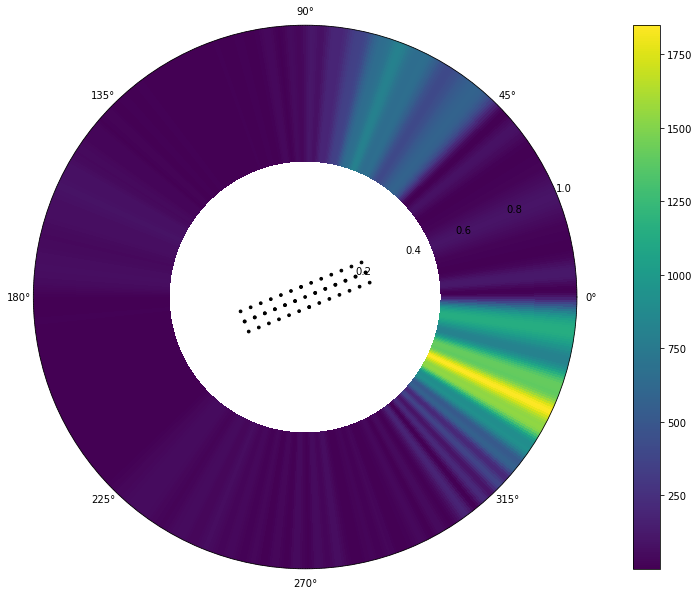

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as colors
import numpy as np
import MeiCalc as MC

fig = plt.figure(figsize=(20,10))
ax1  = plt.subplot(111, polar=True)

#print(len(detectAng))
#print(len(detectR))
#print(len(Eplt))
#print(shape(Eplt))
#pltAng = concatenate((detectAng,-detectAng[-2::-1]))
#pltR = detectR
#print(pltAng)

pltE = []
for i in range(len(Efield)):
    t = Efield[i]
    #tmp = concatenate((t,t[-2::-1]))
    pltE.append(t)
    
pltE = [[abs(e)**2 for e in t] for t in pltE]


#pltAng = concatenate((detectAng,-detectAng[-2::-1]))
pltAng = detectAng

maxV = max(map(max,pltE))
minV = min(map(min,pltE))

p2 = plt.pcolormesh(pltAng, detectR, pltE)#, norm=colors.LogNorm(vmin=minV, vmax=maxV))
#pos = ax1.imshow(pltE, cmap='Blues', interpolation='none')
fig.colorbar(p2,ax=ax1)
#print(Eplt)

braggLine =[0,detectR[-1]]
braggAngle = [pltLine,pltLine]
print(braggAngle)
#plt.plot(braggAngle,braggLine, color='black')
#plt.plot(multiply(braggAngle,.5),braggLine, color='black')


print(shape(r_sp))
print(MC.a)
for s in r_sp:
    #print(s)
    #(angle(s),linalg.norm(s))
    c = plt.Circle((s[1],s[0]),MC.a, transform=ax1.transData._b, color='black')
    ax1.add_artist(c)
#now plot the circles
#plt.grid()

plt.show()